# Invistico_Airline Customer Satisfaction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Invistico_Airline.csv')
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [7]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df2 = df.dropna(axis=0).reset_index(drop = True)

In [10]:
#Check the number of satisfied customers in the dataset
#To predict customer satisfaction,we need to know how many customers in the dataset are satisfied before modeling.
df2['satisfaction'].value_counts(dropna=False)

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

In [13]:
#So selecting X as  Inflight entertainment that can't be "of type int" and  Y as satisfaction that can't be "of type object".
df2 = df2.astype({"Inflight entertainment": float})

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2['satisfaction']=le.fit_transform(df2['satisfaction'])


In [16]:
df2.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


# Splitting the data into Training and Testing

In [17]:
x=df['Inflight entertainment']
y=df['satisfaction']

In [18]:
x

0         4
1         2
2         0
3         4
4         3
         ..
129875    5
129876    1
129877    2
129878    2
129879    3
Name: Inflight entertainment, Length: 129880, dtype: int64

In [19]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int32

# Model Selection

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)


# Model Fitting

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [44]:
print(x_train.shape)  # Display the shape of x_train

(77928, 1)


In [45]:
# If the shape is (n_samples,), reshape it to (n_samples, 1)
if len(x_train.shape) == 1:
    x_train = x_train.values.reshape(-1, 1)


In [46]:
lr.fit(x_train, y_train)

LogisticRegression()

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

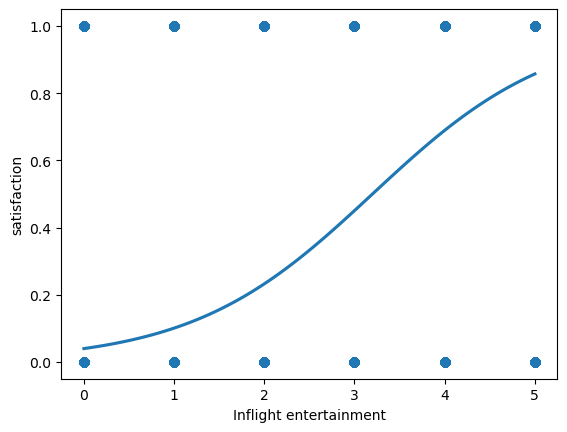

In [48]:
import seaborn as sns
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df2, logistic=True, ci=None)

In [49]:
#The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction,

# Model Prediction

In [55]:
if len(x_test.shape) == 1:
    x_test = x_test.values.reshape(-1, 1)
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [56]:
lr.predict_proba(x_test)

array([[0.31104778, 0.68895222],
       [0.90216311, 0.09783689],
       [0.1417539 , 0.8582461 ],
       ...,
       [0.31104778, 0.68895222],
       [0.1417539 , 0.8582461 ],
       [0.90216311, 0.09783689]])

In [64]:
from sklearn.metrics import accuracy_score,classification_report

In [66]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("__________________________________________________________________________")
print("Precision:",classification_report(y_test, y_pred))


Accuracy: 0.8000269479519556
__________________________________________________________________________
Precision:               precision    recall  f1-score   support

           0       0.78      0.78      0.78     23500
           1       0.82      0.82      0.82     28452

    accuracy                           0.80     51952
   macro avg       0.80      0.80      0.80     51952
weighted avg       0.80      0.80      0.80     51952

